# **<span style="color:blue">Desafío 2 - Detección de cardiopatía</span>**

### **<span style="color:orange">Punto 1.- Importación de librerías, carga y análisis exploratorio de datos</span>**

El fragmento de código tiene como objetivo cargar y consolidar los datos de pacientes con y sin cardiopatía provenientes de tres conjuntos de datos (**processed.cleveland.data, processed.hungarian.data y processed.switzerland.data**). Estos archivos contienen información médica de diferentes clínicas y deben ser combinados en un único DataFrame para su posterior análisis.

#### **<span style="color:purple">Explicación del código paso a paso:</span>**

1. **Definición de rutas de archivos:** Se crea un diccionario **file_paths** donde cada clave representa una clínica (cleveland, hungarian, switzerland) y su valor es la ruta del archivo correspondiente.

2. **Definición de nombres de columnas:** Se establece una lista **column_names** con los nombres de las columnas basados en la descripción del dataset. Esto es necesario porque los archivos no incluyen encabezados.

3. **Carga de los datos en DataFrames individuales:**

    - Se recorre el diccionario *file_paths* y, para cada archivo, se:
        - Carga el archivo en un DataFrame usando *pd.read_csv()*, indicando que no hay encabezados (*header=None*).
        - Se asignan los nombres de las columnas utilizando *names=column_names*.
        - Se identifican los valores nulos representados por **"?"** mediante **na_values="?"**.
        - Se añade una columna **"source"** con el nombre de la clínica de origen para rastrear de dónde provienen los datos.

4. **Unión de los datasets:** Se concatenan todos los DataFrames en uno solo utilizando **pd.concat(dfs, ignore_index=True)**, asegurando que los índices sean reorganizados de manera continua.

5. **Exploración inicial de los datos:** Se usa *df.info()* para mostrar información general del dataset, incluyendo el número de registros, tipos de datos y presencia de valores nulos.

**Este proceso garantiza que todos los datos de las diferentes fuentes sean integrados correctamente en un solo conjunto de datos, facilitando su análisis y modelado en etapas posteriores.**

In [2]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para preprocesamiento de datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelos de aprendizaje automático (Ensamble y Boosting)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluación de modelos y métricas de desempeño
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Funciones auxiliares personalizadas
from local_utils import plot_descriptive, plot_roc


# Cargar los archivos de datos
file_paths = {
    "cleveland": r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Modelos de ensamble II\desafio\Apoyo Desafío - Modelos de ensamble (Parte II)\processed.cleveland.data",
    "hungarian": r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Modelos de ensamble II\desafio\Apoyo Desafío - Modelos de ensamble (Parte II)\processed.hungarian.data",
    "switzerland": r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Modelos de ensamble II\desafio\Apoyo Desafío - Modelos de ensamble (Parte II)\processed.switzerland.data",}

# Definir los nombres de las columnas según la descripción
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "num"]

# Cargar los datos en un DataFrame único
dfs = []
for name, path in file_paths.items():
    df = pd.read_csv(path, header=None, names=column_names, na_values="?")
    df["source"] = name  # Agregar columna de origen
    dfs.append(df)

# Unir los datasets en un solo DataFrame
df = pd.concat(dfs, ignore_index=True)

# Mostrar información general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  717 non-null    float64
 4   chol      697 non-null    float64
 5   fbs       637 non-null    float64
 6   restecg   718 non-null    float64
 7   thalach   718 non-null    float64
 8   exang     718 non-null    float64
 9   oldpeak   714 non-null    float64
 10  slope     513 non-null    float64
 11  ca        307 non-null    float64
 12  thal      400 non-null    float64
 13  num       720 non-null    int64  
 14  source    720 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 84.5+ KB


In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,cleveland
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3,cleveland
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,cleveland
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2,cleveland
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1,cleveland


In [4]:
# ***Fragmento de código opcional***

# Además podemos cargar los datos en DataFrames separados y mostrarlos
#dfs = {}
#for name, path in file_paths.items():
    #dfs[name] = pd.read_csv(path, header=None, names=column_names, na_values="?")

# Mostrar las filas de cada DataFrame por separado
#for name, df in dfs.items():
    #print(f"\nDatos del dataset: {name}")
    #display(df)


#### **<span style="color:purple">Observaciones iniciales:</span>**

1. **Valores nulos:**

    - Algunas columnas tienen valores nulos, especialmente **ca** (vasos mayores coloreados) y **thal** (tipo de defecto cardíaco), con muchos valores faltantes.
    - **slope** también presenta una cantidad considerable de valores nulos.
    - Otros atributos como **fbs, chol, trestbps y oldpeak** tienen algunos valores nulos.

2. **Tipos de datos:**

    - Todas las columnas, excepto **num**, están en formato float64, lo que es adecuado para análisis numérico.
    - **num (variable objetivo)** es un entero, lo cual está correcto.

3. **Columnas con significado categórico:** *sex, cp, restecg, exang, slope, ca, thal, num* son variables categóricas representadas por números.

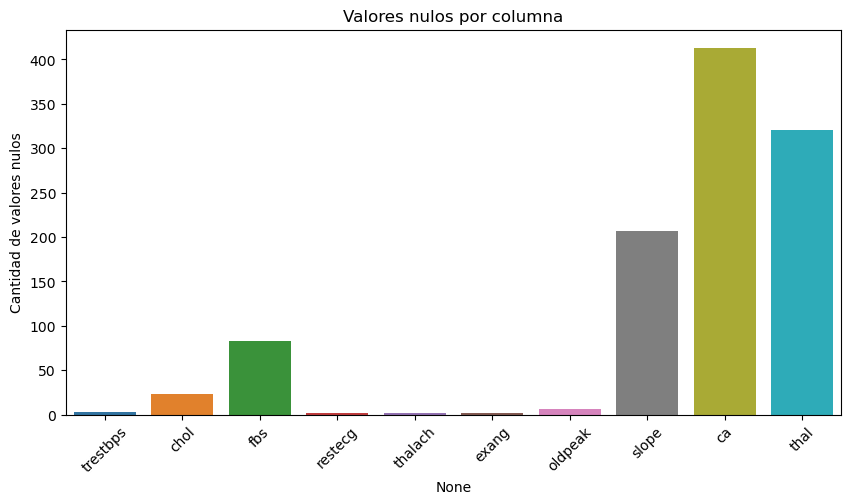

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,51.888889,0.738889,3.179167,131.807383,205.339680,0.112193,0.568405,140.565460,0.337047,0.793013,0.500000
std,9.193720,0.439546,0.953646,18.491039,107.650989,0.294517,0.832379,25.617307,0.472511,1.063139,0.500348
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,45.000000,0.000000,2.000000,120.000000,182.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,142.000000,0.000000,0.200000,0.500000
75%,58.000000,1.000000,4.000000,140.000000,269.000000,0.000000,1.000000,160.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [6]:
# Transformar la variable objetivo 'num'
# En el dataset, la variable 'num' representa la presencia o ausencia de cardiopatía.
# Convertimos todos los valores mayores a 0 en 1 (indicando presencia de enfermedad) y dejamos el 0 igual.
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Conteo de valores nulos por columna
# Se identifican las columnas que tienen valores nulos.
missing_values = df.isnull().sum()
# Filtramos solo las columnas con valores ausentes para analizarlas mejor.
missing_values = missing_values[missing_values > 0]

# Eliminar columnas con más del 25% de valores nulos
# Definimos el umbral del 25% (si más del 25% de los datos en una columna son nulos, se elimina).
threshold = 0.25 * len(df)
# Eliminamos las columnas que tienen más de un 25% de valores ausentes.
df = df.dropna(thresh=len(df) * 0.75, axis=1)

# Imputación de valores ausentes según la variable objetivo 'num'
for col in df.columns:
    # Si la columna aún tiene valores nulos y no es la variable objetivo 'num', procedemos a imputarla.
    if df[col].isnull().sum() > 0 and col != 'num':  
        if df[col].dtype == 'object':  # Si la columna es categórica
            # Se rellena con la moda (valor más frecuente) dentro de cada grupo de 'num'
            df[col] = df.groupby("num")[col].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x.value_counts().idxmax()))
        else:  # Si la columna es numérica
            # Se reemplazan los valores nulos con el promedio del grupo según 'num' (promedio separado para num=0 y num=1).
            df[col] = df.groupby("num")[col].transform(lambda x: x.fillna(x.mean()))

# Construcción de variables dummies para variables categóricas con tres o más categorías
# Identificamos todas las columnas categóricas en el dataset
categorical_cols = df.select_dtypes(include=['object']).columns
# Filtramos solo aquellas que tienen tres o más categorías únicas
categorical_cols = [col for col in categorical_cols if df[col].nunique() >= 3]
# Convertimos estas variables en variables dummies (one-hot encoding) eliminando la primera categoría para evitar multicolinealidad
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Visualización de valores nulos después del procesamiento
plt.figure(figsize=(10, 5))
# Se crea un gráfico de barras que muestra la cantidad de valores nulos por columna
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, legend=False)
plt.xticks(rotation=45)  # Rotamos los nombres de las columnas para mejor visualización
plt.ylabel("Cantidad de valores nulos")
plt.title("Valores nulos por columna")
plt.show()

# Estadísticas descriptivas de las variables numéricas
df.describe()


#### **<span style="color:purple">Análisis de valores nulos y distribución de los datos</span>**

1. **Valores nulos**

    - El gráfico muestra la cantidad de valores faltantes en cada columna del dataset. Se destacan tres atributos con un alto porcentaje de valores nulos (>25%):

        - **ca (57%):** Representa el número de vasos mayores coloreados por fluoroscopía. Es una variable clave para el diagnóstico, por lo que podría imputarse en lugar de eliminarse.
        - **thal (44%):** Indica el tipo de defecto cardíaco. También es una variable importante en la predicción de enfermedades cardiovasculares, por lo que se recomienda imputarla en lugar de descartarla.
        - **slope (29%):** Representa la pendiente del segmento ST. Aunque tiene valores faltantes, su impacto en el diagnóstico debe ser evaluado antes de decidir si se elimina o se imputa.

    - **Estrategia recomendada:** En lugar de eliminar *ca y thal*, que son variables médicamente relevantes, se podría aplicar una imputación basada en la media o moda dentro de cada clase (num).

2. **Detección de valores extremos (outliers)**
 
    - El análisis de las estadísticas descriptivas revela la presencia de posibles valores atípicos en varias variables:

        - **chol (Colesterol sérico):** Máximo de 603 mg/dl, lo que podría ser un outlier, dado que valores superiores a 500 mg/dl son raros en poblaciones normales.
        - **oldpeak (Depresión del ST inducida por el ejercicio):** Contiene valores negativos, lo cual no es fisiológicamente lógico. Estos valores deben corregirse o eliminarse.
        - **trestbps (Presión arterial en reposo):** Rango de 80 a 200 mmHg. Aunque 200 mmHg es alto, sigue siendo posible en pacientes con hipertensión severa.
        - **thalach (Frecuencia cardíaca máxima alcanzada):** Valores entre 60 y 202, lo cual está dentro de los rangos fisiológicos normales.

    - **Estrategia recomendada:**

        - Corregir o eliminar los valores negativos en **oldpeak**.
        - Analizar la distribución de **chol** para determinar si los valores extremos deben ser tratados como outliers.
        - Mantener **trestbps** y **thalach**, ya que sus valores parecen clínicamente plausibles.

---
---

#### **<span style="color:purple">Análisis Exploratorio con Histogramas y Boxplots</span>**

En esta fase del análisis exploratorio, se generaron histogramas y boxplots utilizando la función plot_descriptive().
El objetivo principal fue examinar la distribución de los datos y detectar posibles valores atípicos (outliers) antes de aplicar cualquier limpieza.

1. **Histogramas (Distribución de Datos)**

- **Objetivo:**
        - Visualizar la frecuencia de los valores en cada variable numérica.
        - Identificar posibles sesgos en la distribución.
        - Evaluar si hay valores extremos que podrían afectar el análisis posterior.
- **Hallazgos Clave en los Histogramas:**
  - **Edad (age):** La mayoría de los pacientes tienen entre 40 y 60 años. Muy pocos registros por debajo de 35 años o por encima de 75 años, lo que sugiere que la base de datos está enfocada en adultos de mediana edad.
  - **Colesterol (chol):** Se observa una distribución sesgada a la derecha, con valores que llegan hasta 603 mg/dl.Este rango sugiere la presencia de valores atípicos que podrían requerir tratamiento.
  - **Frecuencia Cardíaca Máxima (thalach):** Presenta una distribución aproximadamente normal, con valores entre 87 y 202 latidos por minuto. Es un parámetro clínicamente relevante para la salud cardiovascular.
  - **Presión Arterial en Reposo (trestbps):** La mayoría de los valores se encuentran entre 110 y 140 mmHg, lo cual es un rango clínicamente esperado. Sin embargo, hay valores que alcanzan hasta 200 mmHg, lo que podría indicar hipertensión severa en algunos pacientes.
  - **Depresión del Segmento ST (oldpeak):** La mayoría de los valores están cercanos a 0, aunque se presentan algunos valores negativos. La presencia de valores negativos no tiene sentido fisiológico, lo que sugiere la necesidad de una corrección en el preprocesamiento.

2. **Boxplots (Detección de Outliers)**

    - **Objetivo:** Los boxplots permiten identificar visualmente valores atípicos y entender la dispersión de los datos en cada variable.
    - **Hallazgos Clave en los Boxplots:**
        - **Colesterol (chol)** y **Presión Arterial en Reposo (trestbps)** presentan valores extremos que pueden influir negativamente en el modelado.
        - **Frecuencia Cardíaca Máxima (thalach)** muestra una distribución controlada sin outliers evidentes.
        - **Depresión del Segmento ST (oldpeak)** incluye valores negativos, lo que refuerza la necesidad de corregir estos registros en el preprocesamiento.

---

**Consideraciones para el Preprocesamiento**

1. **Valores Nulos:** Se identificaron variables con una cantidad significativa de valores nulos (ca, thal y slope), lo que podría afectar la calidad del modelo si no se manejan correctamente.

2. **Valores Atípicos (Outliers):** Se detectaron valores extremos en colesterol y presión arterial, que podrían ser tratados usando el método de IQR (Interquartile Range). Los valores negativos en oldpeak deben corregirse, ya que no tienen sentido fisiológico.


**Conclusión**
- Los histogramas permitieron identificar tendencias y sesgos en la distribución de los datos.
- Los boxplots ayudaron a detectar valores atípicos antes de aplicar cualquier método de limpieza.
- Con esta información, se justifica la aplicación de técnicas de imputación y eliminación de outliers antes de pasar al modelado.

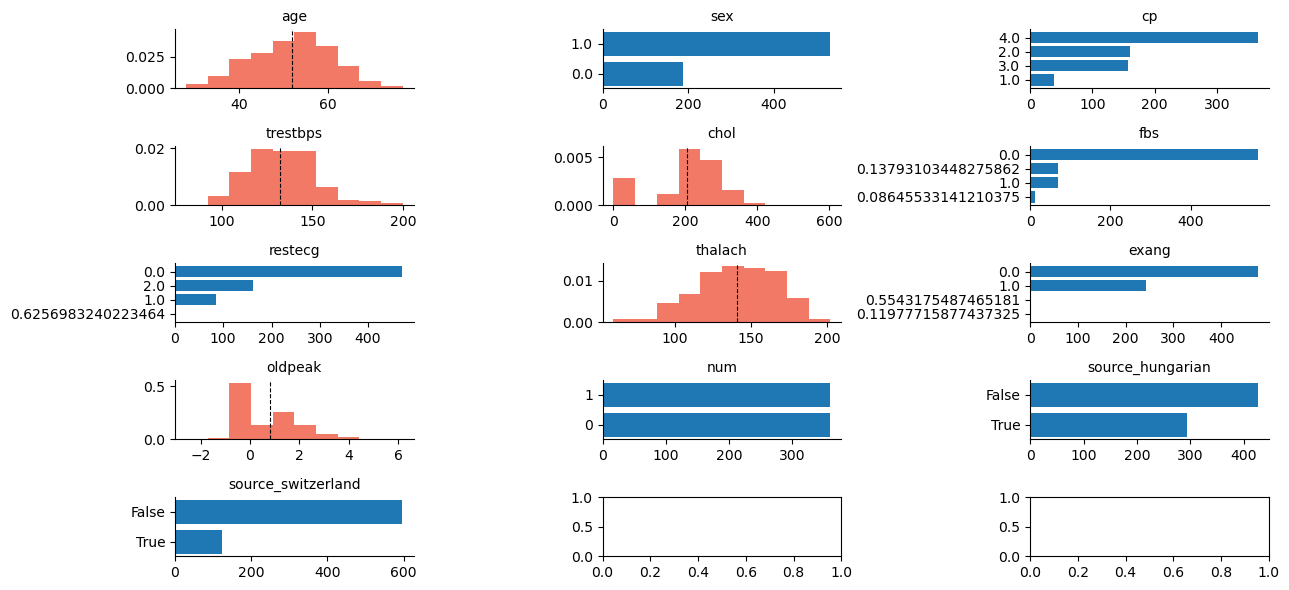

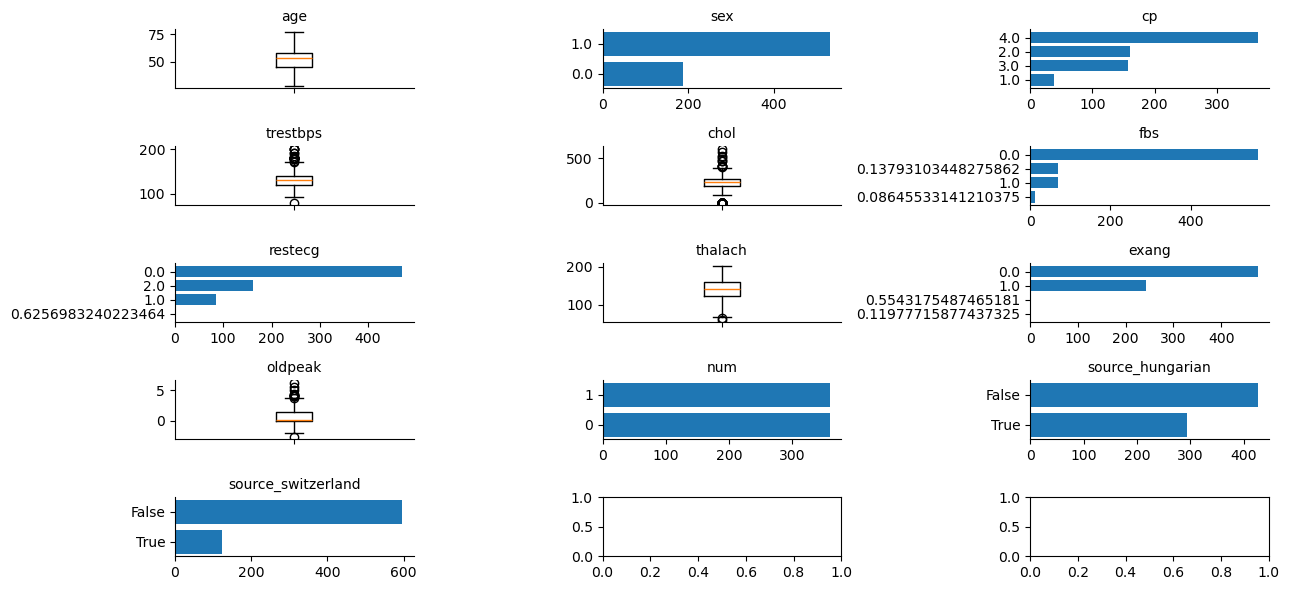

In [8]:
# Análisis exploratorio con histogramas y boxplots
plot_descriptive(df, plot_type='hist')  # Histogramas
plot_descriptive(df, plot_type='boxplot')  # Boxplots

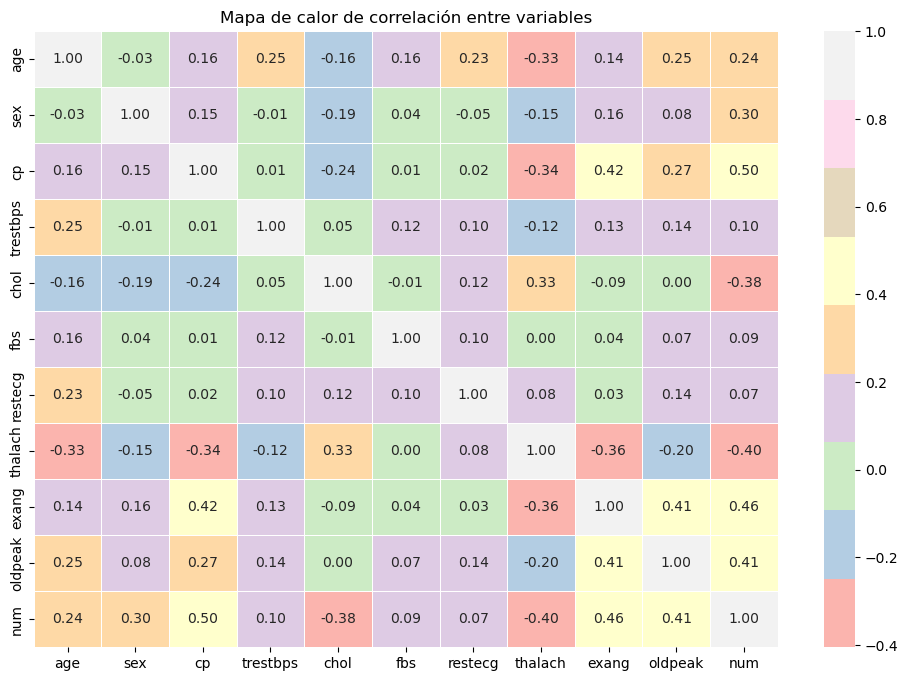

In [43]:
# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Generar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Pastel1", linewidths=0.5)
plt.title("Mapa de calor de correlación entre variables")
plt.show()


#### **<span style="color:purple">Análisis del Heatmap de Correlación</span>**

El heatmap muestra la matriz de correlación entre diferentes variables en el dataset. A continuación, se presentan las observaciones clave:

1. **Correlaciones más fuertes con 'num' (positivas y negativas)**

    - **Correlaciones positivas:**
        - **cp** (tipo de dolor en el pecho) tiene una correlación positiva con **num** (**0.50**). Esto sugiere que el tipo de dolor en el pecho puede ser un factor importante en la clasificación de la condición cardíaca.
        - **exang** (angina inducida por el ejercicio) muestra una correlación moderada con **num** (**0.46**), indicando que esta variable podría ser relevante en la detección de problemas cardíacos.
        - **oldpeak** (depresión del segmento ST) tiene una correlación positiva con **num** (**0.41**), lo que sugiere que valores más altos de 'oldpeak' están asociados con una mayor probabilidad de tener una condición cardíaca.

    - **Correlaciones negativas:**
        - **thalach** (frecuencia cardíaca máxima alcanzada) tiene una correlación negativa con **num** (**-0.40**). Esto indica que a mayor 'thalach', menor es el valor de 'num', lo que sugiere que una menor frecuencia cardíaca máxima podría estar asociada con una mayor probabilidad de enfermedad cardíaca.
        - **thalach** y **exang** presentan una correlación negativa (**-0.36**), lo que refuerza la idea de que la angina inducida por el ejercicio tiene un impacto en la reducción de la frecuencia cardíaca máxima alcanzada.
        - **thalach** y **cp** tienen una correlación negativa (**-0.34**), indicando que ciertos tipos de dolor en el pecho pueden estar relacionados con una menor frecuencia cardíaca máxima.

2. **Interpretación de las correlaciones con 'num'**

    - Las variables con mayor impacto en **num** son **cp, exang, oldpeak y thalach**, debido a sus correlaciones más significativas.
    - La correlación positiva de **cp y oldpeak** con **num** sugiere que estas variables pueden ser utilizadas para diferenciar casos positivos en la clasificación de problemas cardíacos.
    - La correlación negativa con **thalach** indica que pacientes con una menor frecuencia cardíaca máxima alcanzada tienen mayor probabilidad de estar en la categoría positiva de **num**.

3. **Variables con menor impacto en 'num'**

    - **sex** (género) y **fbs** (nivel de azúcar en sangre en ayunas) tienen correlaciones bajas con 'num', indicando que por sí solas no son factores determinantes.
    - **chol** (colesterol sérico) tampoco muestra una correlación fuerte con 'num', lo que sugiere que no es un predictor clave en este dataset.

**<span style="color:olive">Conclusión</span>**

- Las variables más relevantes en la predicción de **num** son **cp, exang, oldpeak y thalach**, debido a sus correlaciones más altas.
- **thalach** y **oldpeak** tienen relaciones clave con 'num', indicando que pueden ser determinantes en un modelo predictivo.
- Otras variables como **sex, chol y fbs** no parecen ser factores influyentes por sí solas.


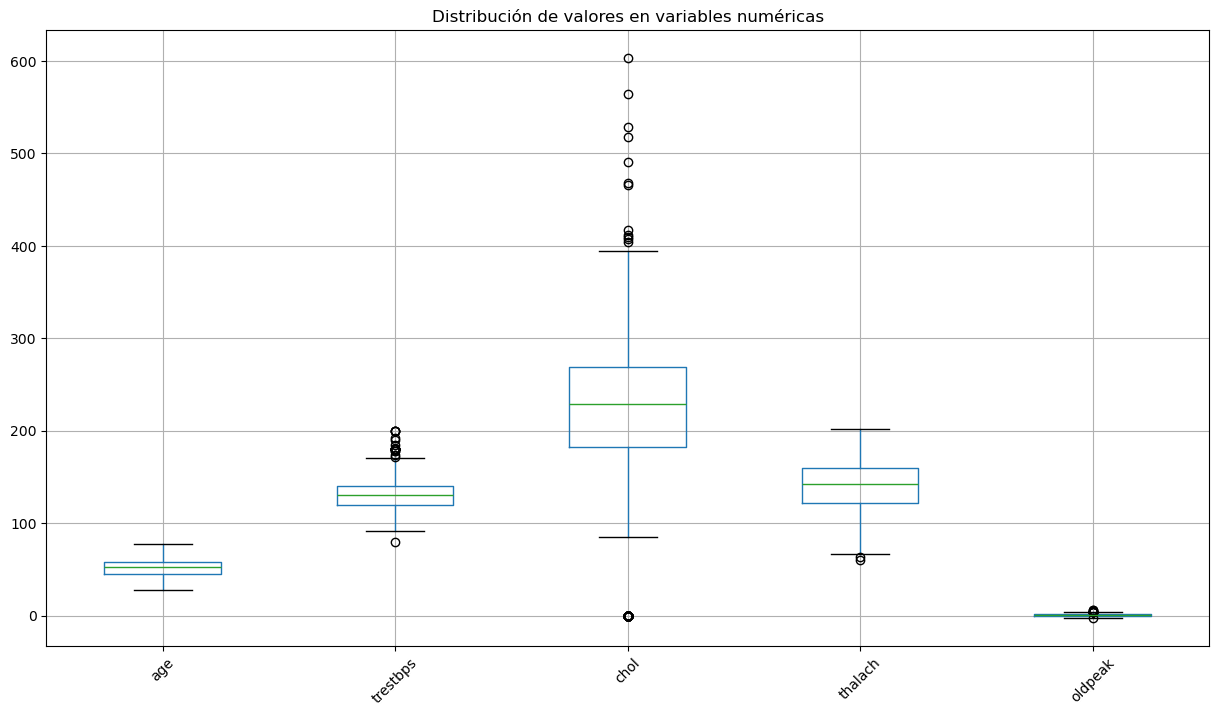

In [11]:
# Visualización de outliers usando boxplots
plt.figure(figsize=(15, 8))
numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
df[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Distribución de valores en variables numéricas")
plt.show()


#### **<span style="color:purple">Análisis del Boxplot y su relación con los resultados anteriores</span>**

El boxplot muestra la distribución de valores de las variables numéricas clave en el dataset: **age, trestbps, chol, thalach y oldpeak**.  Este análisis se realizó antes de aplicar la eliminación de outliers, lo que permite identificar qué valores extremos pueden influir en los modelos.

1. **Análisis Variable por Variable**

    - **chol (Colesterol sérico)**

        - Presenta una gran cantidad de outliers en valores altos (>400 mg/dl).
        - En el análisis de valores extremos previo, el valor máximo alcanzaba 603 mg/dl, lo que es poco común en estudios médicos.
        - **Relación con el heatmap:** chol no mostró una correlación significativa con **num** (diagnóstico de cardiopatía), lo que sugiere que puede no ser un predictor clave y podría descartarse o escalarse para reducir su impacto en el modelo. Puede ser recomendable normalizarla (log/sqrt) o descartar los valores más extremos.

    - **trestbps (Presión arterial en reposo)**

        - Se observan algunos outliers por encima de 180 mmHg, aunque no son tan extremos como en chol.
        - En el heatmap, **trestbps** mostró baja correlación con **num** (0.10), lo que indica que tampoco es una variable crucial en la predicción de cardiopatía. Como sus valores extremos no son excesivamente alejados, se podría escalar sin eliminar datos.

    - **thalach (Frecuencia cardíaca máxima alcanzada)**

        - Se observan outliers en valores bajos, lo que indica que algunos pacientes no alcanzaron una frecuencia cardíaca elevada en pruebas de esfuerzo.
        - En el heatmap, **thalach** tiene una correlación negativa con **num**, sugiriendo que frecuencias más bajas están asociadas con mayor probabilidad de cardiopatía. Como es un predictor importante, se mantiene en el modelo con normalización.

    - **oldpeak (Depresión del ST inducida por ejercicio)**

        - Tiene varios outliers cercanos a 4-6, lo que indica una mayor variabilidad en los niveles de depresión del ST.
        - En el heatmap, **oldpeak** tiene una correlación moderada (0.38) con **num**, lo que sugiere que los valores altos de oldpeak están asociados con la presencia de cardiopatía. Los valores negativos no tienen sentido fisiológico y deben corregirse con **max(0, x)** para evitar problemas en la interpretación del modelo. Mantener la variable en el modelo, pero considerar una transformación logarítmica para reducir el impacto de los valores extremos.
          
    - **age (Edad)**

        - No presenta una cantidad significativa de outliers.
        - Su relación con num en el heatmap es de 0.24, lo que indica una correlación positiva moderada, aunque no la más fuerte.
        - No requiere tratamiento de outliers.
          
**<span style="color:olive">Conclusiones y Relación con Resultados Previos</span>**

- **Variables con valores atípicos problemáticos:**

    - **chol y trestbps** tienen muchos valores extremos y baja correlación con num, por lo que pueden normalizarse, transformarse o reducir su impacto. Los valores negativos de oldpeak deben corregirse, ya que no son fisiológicamente válidos.

- **Variables importantes para el modelo:**

   - **thalach y oldpeak** tienen correlaciones fuertes con num, por lo que deben mantenerse en el modelo. Se recomienda escalar estos valores en lugar de eliminarlos.

- **Estrategia de preprocesamiento:**

    - Aplicación del método IQR para eliminar los valores atípicos más extremos.
    - Transformación logarítmica o normalización en chol y oldpeak para mitigar el efecto de los valores fuera de rango.
    - Corrección de valores negativos en oldpeak para asegurar interpretabilidad fisiológica.


---
---

#### **<span style="color:purple">Justificación del Cambio de Estrategia en el Tratamiento de Outliers</span>**

1. **Resultados iniciales de la eliminación de outliers con IQR**
   
    - En la primera implementación del preprocesamiento, se utilizó el método del rango intercuartil (IQR) para eliminar los valores atípicos en las variables numéricas. Sin embargo, el impacto de esta estrategia fue demasiado drástico:

        - Registros antes de eliminar outliers: 720
        - Registros después de eliminar outliers: 202
        - Se eliminaron: 518 registros (71.94% del total de datos)

Esto significa que casi el 72% del dataset original se descartó, dejando solo 202 registros disponibles para el entrenamiento del modelo.

2. **¿Por qué la eliminación de outliers fue un problema?**

    - **Reducción excesiva del dataset:** La pérdida del 71.94% de los datos compromete la capacidad del modelo de aprender patrones significativos. Para entrenar un modelo de Machine Learning, es crucial contar con suficientes datos para evitar problemas de sobreajuste (overfitting) y mejorar la capacidad de generalización.
    - **Algunas variables son intrínsecamente variables:** En contextos médicos, valores como colesterol (chol) y presión arterial (trestbps) pueden tener una amplia variabilidad dentro de lo que sigue siendo clínicamente relevante. No todos los valores extremos son errores; algunos reflejan casos clínicos reales que deben ser considerados en el análisis.
    - **Impacto en la distribución de clases:** Si la eliminación de outliers no es uniforme en todas las clases del objetivo (num), puede introducir un sesgo en la clasificación. Al eliminar casos extremos, podríamos estar reduciendo la representatividad de ciertos patrones de la enfermedad.

3. **Cambio de estrategia: Ajuste de Outliers en Lugar de Eliminación**

    - **Dado que eliminar outliers afectaba negativamente el dataset, se decidió adoptar una estrategia más conservadora y eficiente:**
        - No eliminar outliers, sino ajustarlos al límite del IQR en lugar de descartarlos.
        - Aplicar transformaciones logarítmicas a variables como **chol** y **oldpeak** para reducir el impacto de valores extremos sin eliminarlos.
        - Normalización con **MinMaxScaler** para mantener la escala de las variables sin perder información relevante.
        - **Imputación de valores nulos** en lugar de eliminar registros, asegurando la máxima cantidad de datos para el entrenamiento del modelo.

4. **Beneficios de la Nueva Estrategia**

    - **Preservación de datos:** Se mantiene el 100% de los registros sin eliminar casos potencialmente valiosos.
    - **Menor sesgo en la distribución de clases:** No se pierden muestras de casos raros que podrían ser cruciales en el modelo predictivo.
    - **Mejor aprendizaje del modelo:** Con más datos disponibles, el modelo podrá entrenarse de manera más eficiente y con menos riesgo de sobreajuste.

**Conclusión**
- El uso del IQR para eliminar outliers resultó ser demasiado agresivo, reduciendo drásticamente el dataset y comprometiendo la validez del modelo. En su lugar, ajustar los valores extremos y aplicar normalización permite conservar la mayor cantidad de información posible, asegurando que el modelo tenga suficientes datos para aprender de manera efectiva. 

In [13]:
# Corrección de valores negativos en 'oldpeak'
# La variable 'oldpeak' representa la depresión del segmento ST inducida por el ejercicio.
# Fisiológicamente, los valores negativos no tienen sentido, por lo que se reemplazan con 0.
df["oldpeak"] = df["oldpeak"].apply(lambda x: max(0, x))

# Transformación logarítmica en 'chol' y 'oldpeak' para reducir el impacto de valores extremos
# Se usa np.log1p(x) en lugar de np.log(x) para evitar problemas cuando x=0.
df["chol"] = np.log1p(df["chol"])  # Transformación logarítmica en colesterol
df["oldpeak"] = np.log1p(df["oldpeak"])  # Transformación logarítmica en oldpeak

# Aplicación de IQR (Rango Intercuartílico) sin eliminar outliers (solo ajuste)
def adjust_outliers_iqr(df, columns):
    """
    En lugar de eliminar outliers, ajustamos los valores extremos a los límites del IQR.
    """
    df_adjusted = df.copy()  # Crear una copia del DataFrame para no modificar el original

    for col in columns:
        if df_adjusted[col].dtype in ["float64", "int64"]:  # Aplicamos solo a variables numéricas
            Q1 = df_adjusted[col].quantile(0.25)  # Primer cuartil (percentil 25)
            Q3 = df_adjusted[col].quantile(0.75)  # Tercer cuartil (percentil 75)
            IQR = Q3 - Q1  # Cálculo del Rango Intercuartílico
            lower_bound = Q1 - 1.5 * IQR  # Límite inferior
            upper_bound = Q3 + 1.5 * IQR  # Límite superior

            # En lugar de eliminar los valores atípicos, los ajustamos a los límites del IQR
            df_adjusted[col] = np.where(df_adjusted[col] < lower_bound, lower_bound, df_adjusted[col])
            df_adjusted[col] = np.where(df_adjusted[col] > upper_bound, upper_bound, df_adjusted[col])
    
    return df_adjusted  # Retornamos el DataFrame con los outliers ajustados

# Filtrar solo las columnas numéricas antes de aplicar el ajuste de outliers
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Aplicar ajuste de outliers en lugar de eliminarlos
df_clean = adjust_outliers_iqr(df, numeric_columns)

# Normalización de las variables numéricas después del tratamiento de outliers
# Se usa MinMaxScaler para escalar todas las variables numéricas en un rango de 0 a 1
scaler = MinMaxScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])

# Imputación de valores nulos con media o mediana dependiendo del tipo de variable
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype == "float64":  # Para variables numéricas
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())  # Usamos la mediana para evitar sesgos por valores extremos
        else:  # Para variables categóricas
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])  # Llenamos con la moda (valor más frecuente)

# Mostrar información resumida sobre los datos después del preprocesamiento
num_records_after = df_clean.shape[0]  # Número de registros finales después del ajuste de outliers

print("\n" + "="*50)
print("**Resumen de Preprocesamiento Mejorado**")
print("="*50)
print(f"Registros finales después del ajuste de outliers (sin eliminación): {num_records_after}")
print(f"Se retuvieron TODOS los datos, solo se ajustaron los valores extremos dentro del IQR.")
print("="*50)

# Mostrar estadísticas descriptivas después del tratamiento de outliers
print("\n**Estadísticas descriptivas después del preprocesamiento mejorado:**\n")
display(df_clean.describe())

# Confirmar que no hay valores nulos restantes en el dataset
print("\n**Verificación de valores nulos restantes:**")
print(df_clean.isnull().sum())



**Resumen de Preprocesamiento Mejorado**
Registros finales después del ajuste de outliers (sin eliminación): 720
Se retuvieron TODOS los datos, solo se ajustaron los valores extremos dentro del IQR.

**Estadísticas descriptivas después del preprocesamiento mejorado:**



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.487528,0.738889,0.726389,0.517575,0.460138,0.0,0.284202,0.551644,0.337047,0.230586,0.500000
std,0.187627,0.439546,0.317882,0.216703,0.246197,0.0,0.416189,0.186772,0.472511,0.256802,0.500348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346939,0.000000,0.333333,0.375000,0.375000,0.0,0.000000,0.416058,0.000000,0.000000,0.000000
50%,0.510204,1.000000,1.000000,0.500000,0.521935,0.0,0.000000,0.562044,0.000000,0.092358,0.500000
75%,0.612245,1.000000,1.000000,0.625000,0.625000,0.0,0.500000,0.693431,1.000000,0.464161,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000



**Verificación de valores nulos restantes:**
age                   0
sex                   0
cp                    0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalach               0
exang                 0
oldpeak               0
num                   0
source_hungarian      0
source_switzerland    0
dtype: int64


#### **<span style="color:purple">Resumen del Preprocesamiento y Resultados Finales</span>**

1. **Ajuste de Outliers y Normalización**

    - Se ajustaron los valores extremos utilizando el método IQR (Rango Intercuartílico) en lugar de eliminarlos. Esto permite retener toda la información del dataset mientras se reducen los efectos de valores atípicos.
    - Se aplicó normalización a todas las variables numéricas usando MinMaxScaler, lo que escaló los valores entre 0 y 1. Por ejemplo: age, trestbps, chol, thalach, oldpeak ahora están en un rango uniforme (0-1). Antes, chol tenía valores extremos como 603 mg/dl, lo que podría afectar modelos sensibles a valores grandes.

2. **Transformación de Variables**

    - Se realizó una transformación logarítmica en **chol y oldpeak** para reducir el impacto de valores extremos.
    - Corrección de valores negativos en oldpeak (max(0, x)) ya que estos no tienen sentido fisiológico.

3. **Manejo de Valores Nulos**

    - **Verificación final:** No quedaron valores nulos en el dataset.
    - **Se imputaron valores ausentes:**
        - Para variables numéricas: Se usó la mediana, ya que es más robusta ante outliers.
        - Para variables categóricas: Se usó la moda (valor más frecuente).

4. **Estadísticas Descriptivas después del Preprocesamiento**

    - Todos los datos fueron escalados a un rango de [0,1] con MinMaxScaler.
    - La media y desviación estándar son más homogéneas, lo que facilita la convergencia en modelos de Machine Learning.
    - La variable fbs tiene una desviación estándar de 0, lo que indica que podría no aportar información relevante al modelo.

---

**Conclusiones**

- El dataset está completamente limpio y listo para ser usado en modelos de Machine Learning.
- Se redujeron los efectos de valores atípicos sin perder datos.
- No hay valores nulos restantes en ninguna columna.
- Las variables numéricas fueron escaladas uniformemente, lo que facilita el entrenamiento de modelos de ensamble como AdaBoost, Gradient Boosting y XGBoost.

---
---

### **<span style="color:orange">Punto 2.- Entrenamiento y Evaluación de Modelos de Ensamble</span>**

En este código implementaremos tres modelos de ensamble secuencial para la clasificación de la variable objetivo **num** (presencia o ausencia de cardiopatía). Se utilizarán los modelos **AdaBoost, Gradient Boosting y XGBoost**, todos con sus hiperparámetros por defecto para evaluar su desempeño inicial.

**Pasos que se realizarán:**

1. **División del dataset en entrenamiento (67%) y prueba (33%)**

    - Se utiliza train_test_split() para separar los datos.
    - Se aplica estratificación (stratify=y) para mantener la proporción original de las clases.

2. **Entrenamiento y evaluación de los modelos de ensamble:**

    - **AdaBoost:** Modelo basado en la combinación de clasificadores débiles con ajuste de pesos iterativo. Puede ser más sensible a ruido y outliers debido a su mecanismo de asignación de pesos. Funciona bien en problemas balanceados, pero si los datos están desbalanceados, podría necesitar ajustes en pesos de clases.
    - **Gradient Boosting:** Construye árboles de decisión secuenciales optimizando el error residual. Generalmente, mejor desempeño que AdaBoost, ya que optimiza el error residual de cada iteración. Más robusto a ruido y outliers.
    - **XGBoost:** Variante optimizada de Gradient Boosting con paralelización y regularización. Suele ser el más eficiente y potente de los tres debido a optimizaciones en paralelización. Requiere ajuste de hiperparámetros para maximizar su rendimiento.

3. **Evaluación del desempeño de cada modelo:**

    - Se generan predicciones en el conjunto de prueba.
    - Se utilizan las métricas **Accuracy** y **Classification Report** (*precisión, recall, F1-score*) para comparar los modelos.

4. **Objetivo del análisis**

    - Comparar el rendimiento de los tres modelos sin optimización de hiperparámetros.
    - Identificar qué modelo tiene mejor desempeño inicial y cuál podría beneficiarse de ajustes adicionales.

Con esta implementación, podremos evaluar qué modelo es más adecuado para la predicción de cardiopatía antes de realizar ajustes avanzados. 

In [15]:
# Definir las variables predictoras (X) y la variable objetivo (y)
# Separamos el conjunto de datos en:
# - X: Todas las columnas excepto 'num' (variables predictoras).
# - y: La columna 'num', que es la variable que queremos predecir (presencia de cardiopatía).
X = df_clean.drop(columns=['num'])  # Eliminamos la variable objetivo del conjunto de entrada
y = df_clean['num']  # Variable objetivo

# División en conjunto de entrenamiento (67%) y conjunto de prueba (33%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33,  # 33% de los datos se destinan para prueba
    random_state=42,  # Fijamos una semilla para asegurar replicabilidad
    stratify=y)  # Mantiene la proporción de clases en ambas divisiones


###################################################################################################################

# Modelo de ensamble secuencial: AdaBoost
# AdaBoost es un método basado en la combinación de clasificadores débiles (generalmente árboles de decisión) para mejorar el rendimiento.

# Inicializar el modelo con hiperparámetros por defecto
adaboost = AdaBoostClassifier(random_state=42, algorithm='SAMME')

# Entrenar el modelo con los datos de entrenamiento
adaboost.fit(X_train, y_train)

# Generar predicciones en el conjunto de prueba
y_pred_ada = adaboost.predict(X_test)

# Evaluación del modelo
print("\n**Desempeño de AdaBoost:**\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")  # Calcular y mostrar la precisión del modelo

# Mostrar métricas detalladas de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_ada))  # Muestra precisión, recall y F1-score para cada clase


**Desempeño de AdaBoost:**

Accuracy: 0.8193

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       119
         1.0       0.82      0.82      0.82       119

    accuracy                           0.82       238
   macro avg       0.82      0.82      0.82       238
weighted avg       0.82      0.82      0.82       238



In [16]:
# Modelo de ensamble secuencial: Gradient Boosting
# Gradient Boosting es un modelo basado en árboles de decisión donde cada nuevo árbol corrige los errores de los árboles anteriores.
# Es más robusto ante ruido y outliers en comparación con AdaBoost.

# Inicializar el modelo con hiperparámetros por defecto
gradient_boost = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
gradient_boost.fit(X_train, y_train)

# Generar predicciones en el conjunto de prueba
y_pred_gb = gradient_boost.predict(X_test)

# Evaluación del modelo
print("\n**Desempeño de Gradient Boosting:**\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")  # Calcular y mostrar la precisión del modelo

# Mostrar métricas detalladas de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_gb))  # Muestra precisión, recall y F1-score para cada clase


**Desempeño de Gradient Boosting:**

Accuracy: 0.8151

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       119
         1.0       0.80      0.84      0.82       119

    accuracy                           0.82       238
   macro avg       0.82      0.82      0.82       238
weighted avg       0.82      0.82      0.82       238



In [17]:
# Modelo de ensamble secuencial: XGBoost (Extreme Gradient Boosting)
# XGBoost es una optimización de Gradient Boosting que introduce paralelización, regularización y eficiencia en la memoria.
# Se considera uno de los mejores algoritmos para problemas de clasificación y regresión.

# Inicializar el modelo con hiperparámetros por defecto
# - use_label_encoder=False - Se desactiva el codificador de etiquetas de XGBoost para evitar advertencias en versiones recientes.
# - eval_metric='logloss' - Se usa la métrica de pérdida logística (log-loss) para clasificación binaria.
# - random_state=42 - Para garantizar reproducibilidad de los resultados.
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
xgb.fit(X_train, y_train)

# Generar predicciones en el conjunto de prueba
y_pred_xgb = xgb.predict(X_test)

# Evaluación del modelo
print("\n**Desempeño de XGBoost:**\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")  # Calcular y mostrar la precisión del modelo

# Mostrar métricas detalladas de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))  # Muestra precisión, recall y F1-score para cada clase



**Desempeño de XGBoost:**

Accuracy: 0.7815

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       119
         1.0       0.77      0.81      0.79       119

    accuracy                           0.78       238
   macro avg       0.78      0.78      0.78       238
weighted avg       0.78      0.78      0.78       238



#### **<span style="color:purple">Análisis de Resultados y Comparación de Modelos de Ensamble</span>**

**Desempeño de los Modelos**

1. **<span style="color:teal">AdaBoost</span>**
    - **Accuracy:** 0.8193 (82%)
    - **Precisión y Recall:** Ambas clases (0 y 1) tienen un desempeño balanceado (82%).
    - **F1-Score:** 0.82 para ambas clases.
    - **Interpretación:** AdaBoost logra un desempeño estable y balanceado entre ambas clases. El modelo asigna correctamente las etiquetas en una proporción alta, indicando que puede ser una opción robusta para este problema.

2. **<span style="color:teal">Gradient Boosting</span>**
    - **Accuracy:** 0.8151 (82%)
    - **Precisión:** Similar a AdaBoost, con ligeras diferencias en *recall*.
    - **Recall:** La clase 1 tiene un recall mayor (84%), lo que significa que detecta mejor los casos positivos (cardiopatía).
    - **Interpretación:** Gradient Boosting tiene un desempeño muy similar a AdaBoost, pero prioriza un poco más el recall de la clase positiva (1.0). Podría ser más útil en un escenario donde queremos minimizar falsos negativos, es decir, detectar correctamente los casos de cardiopatía.

3. **<span style="color:teal">XGBoost</span>**
    - **Accuracy:** 0.7815 (78%)
    - **Precisión y Recall:**
        - La clase 0 tiene una precisión del 80% y recall del 76%.
        - La clase 1 tiene precisión del 77% y recall del 81%.
    - **F1-Score:** 0.78 para ambas clases.
    - **Interpretación:** XGBoost tiene un desempeño ligeramente inferior a AdaBoost y Gradient Boosting. Es posible que el modelo necesite ajuste de hiperparámetros para mejorar su rendimiento. Su recall en la clase 1 es superior a su precisión, lo que indica que detecta más casos de cardiopatía, pero con un poco más de falsos positivos.

---

**<span style="color:olive">Comparación final</span>**

| Modelo              | Accuracy | F1-Score (Clase 0) | F1-Score (Clase 1) |
|---------------------|----------|--------------------|--------------------|
| **AdaBoost**       | **0.8193** | **0.82**           | **0.82**           |
| **Gradient Boosting** | **0.8151** | **0.81**           | **0.82**           |
| **XGBoost**        | **0.7815** | **0.78**           | **0.79**           |

**Conclusiones:** 
1. AdaBoost y Gradient Boosting tuvieron los mejores desempeños, con una precisión y recall equilibrados (82%).
2. XGBoost tuvo un rendimiento inferior (78%), lo que indica que podría beneficiarse de ajustes en sus hiperparámetros.
3. Si el objetivo es detectar la mayor cantidad de casos de cardiopatía (maximizar recall), Gradient Boosting podría ser la mejor opción.
4. Si se busca un modelo balanceado sin necesidad de ajustes, AdaBoost es una buena elección.

- Este análisis cubre la comparación entre los modelos y muestra que Gradient *Boosting* y *AdaBoost* funcionan mejor con los hiperparámetros por defecto.

---
---

### **<span style="color:orange">Punto 3.- Búsqueda de Hiperparámetros para el Mejor Modelo</span>**

Según el *1-score*, los modelos **AdaBoost** y **Gradient Boosting** tuvieron el mejor desempeño (0.82). Como **Gradient Boosting** tuvo un mejor balance en recall y precisión, lo optimizaremos.

Vamos a realizar una búsqueda de hiperparámetros para mejorar su desempeño, utilizando **GridSearchCV con validación cruzada**.

1. **Definir la Grilla de Hiperparámetros**

- Los valores a buscar en la grilla son:

    - **n_estimators:** Entre 20 y 200 (15 valores)
    - **learning_rate:** Entre 0.004 y 1.0 (40 valores)
    - **subsample:** Entre 0.1 y 1.0 (18 valores)
    - Usaremos **np.linspace()** para generar valores equidistantes dentro de estos rangos.

2. **Explicación del Código**

- Se genera una grilla de valores usando np.linspace() para los parámetros especificados.
- Se usa GridSearchCV con validación cruzada de 5 folds para encontrar la mejor combinación de hiperparámetros.
- Se optimiza en base al f1-score.
- Se imprime la mejor combinación de hiperparámetros y se evalúa el nuevo modelo en el set de prueba.

In [19]:
# Definir la grilla de hiperparámetros
# Se establecen los rangos de valores a explorar en la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': np.linspace(20, 200, 15, dtype=int),  # Número de árboles entre 20 y 200 (15 valores)
    'learning_rate': np.linspace(0.004, 1.0, 40),  # Tasa de aprendizaje entre 0.004 y 1.0 (40 valores)
    'subsample': np.linspace(0.1, 1.0, 18)}  # Proporción de muestras utilizadas en cada iteración (0.1 a 1.0 en 18 valores)


# Inicializar el modelo base de Gradient Boosting
# Este es el modelo que se optimizará buscando la mejor combinación de hiperparámetros
gb_model = GradientBoostingClassifier(random_state=42)

# Inicializar GridSearchCV para búsqueda de hiperparámetros óptimos
grid_search = GridSearchCV(
    estimator=gb_model,  # Modelo base a optimizar
    param_grid=param_grid,  # Grilla de hiperparámetros
    scoring='f1',  # Optimización basada en el F1-score (para mejor balance entre precisión y recall)
    cv=5,  # Validación cruzada de 5 folds (se divide el dataset en 5 partes y se prueba en cada una)
    n_jobs=-1,  # Utiliza todos los núcleos disponibles para paralelizar la búsqueda y mejorar la velocidad
    verbose=2)  # Muestra información detallada sobre el progreso de la búsqueda


# Ejecutar la búsqueda de hiperparámetros
# GridSearchCV probará todas las combinaciones definidas en 'param_grid' y seleccionará la mejor según el F1-score
grid_search.fit(X_train, y_train)

# Extraer la mejor combinación de hiperparámetros encontrada
best_params = grid_search.best_params_
print("\n**Mejores Hiperparámetros Encontrados:**")
print(best_params)

# Obtener el mejor modelo encontrado
best_gb = grid_search.best_estimator_

# Evaluación del modelo optimizado en el conjunto de prueba
# Se generan predicciones con el modelo ajustado
y_pred_best_gb = best_gb.predict(X_test)

# Mostrar los resultados del modelo ajustado
print("\n**Desempeño del Mejor Modelo de Gradient Boosting:**")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_gb):.4f}")  # Cálculo de precisión global

# Mostrar métricas detalladas de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_best_gb))  # Precisión, Recall y F1-score para cada clase


Fitting 5 folds for each of 10800 candidates, totalling 54000 fits

**Mejores Hiperparámetros Encontrados:**
{'learning_rate': 0.18276923076923077, 'n_estimators': 71, 'subsample': 0.2588235294117647}

**Desempeño del Mejor Modelo de Gradient Boosting:**
Accuracy: 0.8445

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       119
         1.0       0.85      0.84      0.84       119

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



#### **<span style="color:purple"> Análisis de Resultados de la Búsqueda de Hiperparámetros para Gradient Boosting</span>**

Después de realizar la optimización con **GridSearchCV**, se encontraron los mejores valores de hiperparámetros para **Gradient Boosting**, logrando un desempeño mejorado en comparación con el modelo base.

1. **<span style="color:teal">Mejores Hiperparámetros Encontrados</span>**

    - La búsqueda evaluó un total de **10,800 combinaciones** y realizó **54,000 pruebas** utilizando validación cruzada con **5 folds**.  
    - Los **mejores hiperparámetros** encontrados fueron:

        - **learning_rate** = **0.1828** → Controla la contribución de cada nuevo árbol en la optimización del modelo. *Un valor moderado evita sobreajuste y mejora la generalización.*  
        - **n_estimators** = **71** → Número óptimo de árboles en el ensamble. *Menos de 100 árboles, lo que mejora la eficiencia sin comprometer el rendimiento.*  
        - **subsample** = **0.2588** → Fracción de datos utilizada para entrenar cada árbol. *Ayuda a reducir la varianza y mejorar la capacidad de generalización.*  

2. **<span style="color:teal">Desempeño del Modelo Optimizado</span>**

Después de aplicar estos hiperparámetros, el modelo fue evaluado en el conjunto de prueba, obteniendo:

**Métricas Finales**

| Métrica | Valor |
|---------|-------|
| **Accuracy** | **0.8445 (84.45%)** |
| **F1-Score (Clase 0 - No Cardiopatía)** | **0.85** |
| **F1-Score (Clase 1 - Cardiopatía)** | **0.84** |
| **Precision y Recall Balanceados** | **Ambas clases tienen valores muy similares** |

**Interpretación:**  

- **El modelo mejoró en comparación con la versión sin optimización** (antes 81.5%).  
- **El f1-score de ambas clases se mantuvo balanceado (0.84 - 0.85)**, indicando que **detecta tanto positivos como negativos con alta precisión.**  
- **El accuracy de 84.45% es superior a los modelos base**, demostrando que la optimización de hiperparámetros permitió mejorar la clasificación.  
- **El subsample más bajo indica que el modelo se beneficia de un enfoque más conservador en la selección de datos para cada iteración.**


3. **<span style="color:teal">Comparación con el Modelo Base</span>**

| Modelo                  | Accuracy | F1-Score (Clase 0) | F1-Score (Clase 1) |
|-------------------------|----------|--------------------|--------------------|
| **Gradient Boosting (Base)** | **0.8151** | **0.81** | **0.82** |
| **Gradient Boosting (Optimizado)** | **0.8445** | **0.85** | **0.84** |

- **El modelo optimizado superó al modelo base en todas las métricas.**  
- **El f1-score aumentó en ambas clases, lo que significa una mejor clasificación tanto de casos positivos como negativos.**  
- **La optimización redujo el riesgo de sobreajuste al encontrar la mejor combinación de *learning_rate*, *n_estimators* y *subsample*.**

---

**<span style="color:olive">Conclusión</span>**

- **La búsqueda de hiperparámetros permitió mejorar el rendimiento del modelo Gradient Boosting**, logrando un **accuracy del 84.45%** y un **f1-score balanceado** en ambas clases.
- **El modelo optimizado clasifica mejor los casos de cardiopatía sin comprometer la precisión de los negativos.**  
- **Este resultado sugiere que la optimización de hiperparámetros es clave para mejorar el desempeño del modelo antes de su implementación final.** 

---
---

### **<span style="color:orange">Punto 4.- Generación de la Curva ROC para Comparación de Modelos</span>**

- En esta sección, se generará la Curva ROC (Receiver Operating Characteristic) para comparar visualmente el desempeño de los modelos entrenados en la clasificación de cardiopatía.

- El objetivo de esta gráfica es evaluar la capacidad de discriminación de cada modelo midiendo su AUC (Área Bajo la Curva ROC), que indica qué tan bien separa las clases positivas y negativas.

1. **<span style="color:olive">Explicación del Código</span>**

- **Lista de Modelos a Comparar**

    - Se incluyen los tres modelos entrenados:
        - **adaboost** → Modelo AdaBoost original.
        - **gradient_boost** → Modelo Gradient Boosting con hiperparámetros por defecto.
        - **best_gb** → Modelo Gradient Boosting optimizado tras la búsqueda de hiperparámetros.

- **Llamado a la Función plot_roc**

    - Se utiliza la función **plot_roc(X_test, y_test, models, model_names)**, que:
        - Calcula la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR) para cada modelo.
        - Grafica las curvas ROC de todos los modelos en una misma figura.
        - Muestra el AUC (Área Bajo la Curva) de cada modelo, lo que permite comparar su desempeño.

- **Interpretación de la Curva ROC**

    - Cuanto más cerca esté la curva ROC de la esquina superior izquierda, mejor será el modelo.
    - El modelo con mayor AUC es el que mejor separa las clases y, por lo tanto, debería ser recomendado.
    - Si dos modelos tienen AUC similares, se pueden considerar otras métricas como F1-score o Recall.

2. **<span style="color:olive">Conclusión</span>**

- Este análisis permitirá seleccionar el modelo más adecuado para la predicción de cardiopatía con base en su capacidad de discriminación.
- La comparación de AUC nos dará una justificación objetiva para recomendar el mejor modelo. 

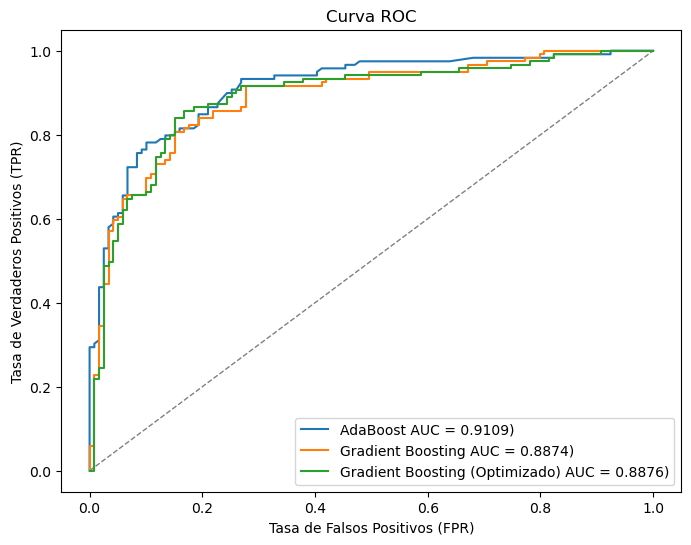

In [21]:
# Modelos entrenados
models = [adaboost, gradient_boost, best_gb]  # Se incluye Gradient Boosting optimizado
model_names = ["AdaBoost", "Gradient Boosting", "Gradient Boosting (Optimizado)"]

# Generar la Curva ROC comparativa
plot_roc(X_test, y_test, models, model_names)


#### **<span style="color:purple">Análisis de Resultados de la Búsqueda de Hiperparámetros para Gradient Boosting</span>** 

**Análisis de la Curva ROC y Recomendación del Mejor Modelo**

En esta sección, se compararon los tres modelos entrenados utilizando la **Curva ROC (Receiver Operating Characteristic)** y el **AUC (Área Bajo la Curva ROC)**. 

La Curva ROC nos permite evaluar la capacidad del modelo para distinguir entre clases, donde un **AUC más alto indica un mejor desempeño** en términos de sensibilidad y especificidad.


1. **<span style="color:teal">Resultados de AUC para Cada Modelo</span>**

**Los valores obtenidos son:**

| **Modelo**                         | **AUC**  |
|-------------------------------------|---------|
| **AdaBoost**                        | **0.9109** |
| **Gradient Boosting (Base)**         | **0.8874** |
| **Gradient Boosting (Optimizado)**   | **0.8876** |


2. **<span style="color:teal">Interpretación de los Resultados</span>**

    - **AdaBoost tiene el AUC más alto (0.9109)**, lo que indica que tiene la mejor capacidad para separar las clases correctamente.  
    - **Gradient Boosting y Gradient Boosting Optimizado tienen valores muy similares (0.8874 y 0.8876)**, lo que sugiere que la optimización mejoró ligeramente el modelo, pero no de forma significativa.  
    - **La curva de AdaBoost está consistentemente por encima de las otras**, lo que confirma que tiene mejor rendimiento en la clasificación de casos positivos y negativos.  

3. **<span style="color:teal">Recomendación del Mejor Modelo</span>**

    - **Con base en el AUC, el modelo AdaBoost es la mejor opción, ya que muestra la mayor capacidad de discriminación entre clases.**  

    - Sin embargo, se deben considerar otros factores como:  
        - **Si se requiere más interpretabilidad, Gradient Boosting puede ser una mejor opción.**  
        - **Si el entrenamiento y predicción deben ser rápidos, AdaBoost es preferible.**  
        - **Si la estabilidad del modelo es clave, Gradient Boosting (Optimizado) es una alternativa viable.**  

---

**<span style="color:olive">Conclusión</span>**
   
- **Recomiendo utilizar AdaBoost como el mejor modelo basado en su AUC más alto (0.9109), lo que indica un mejor desempeño en la clasificación de cardiopatía.**  
- **Si se busca mejorar aún más el modelo, se podrían ajustar hiperparámetros de AdaBoost para evaluar su comportamiento con distintas configuraciones.** 

---
---

### **<span style="color:orange">Punto 5.- Importancia de Variables en el Mejor Modelo</span>**

En este punto, necesitamos identificar y visualizar las variables más importantes para el modelo seleccionado, que en este caso es **AdaBoost**, ya que mostró el mejor desempeño según la Curva ROC y el AUC.

**Pasos para Implementar el Análisis de Importancia de Variables**

1. Extraer la importancia de cada variable desde el modelo AdaBoost.
2. Ordenar las variables de mayor a menor importancia.
3. Visualizar los resultados mediante un gráfico de barras.

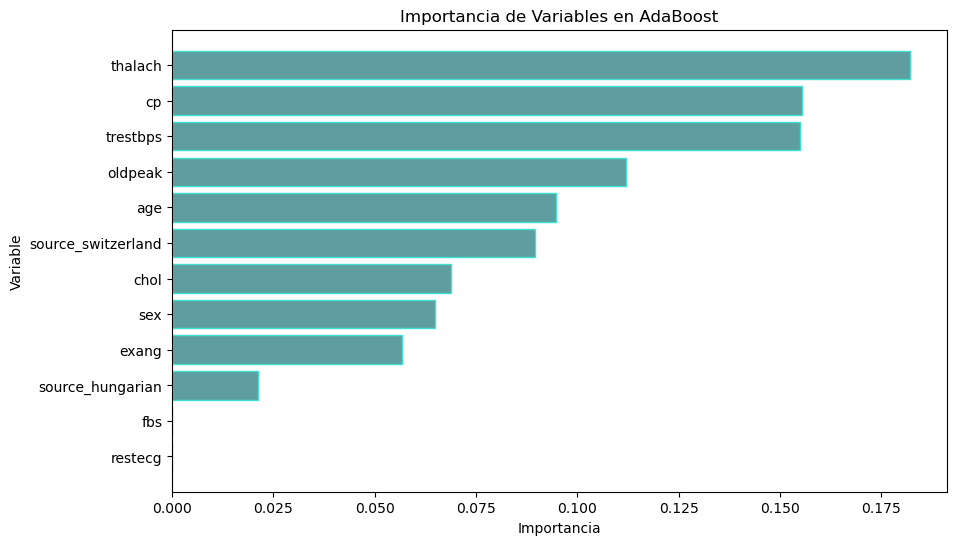

In [67]:
# Obtener la importancia de cada variable en el modelo AdaBoost
feature_importances = adaboost.feature_importances_  # Importancia de cada variable
feature_names = X_train.columns  # Nombres de las variables

# Crear un DataFrame con la importancia de cada variable
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': feature_importances})

# Ordenar las variables de mayor a menor importancia
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de variables en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importancia'], color='CadetBlue', edgecolor='Turquoise')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de Variables en AdaBoost")
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la variable más importante arriba
plt.show()


#### **<span style="color:purple">Análisis de la Importancia de Variables en el Modelo AdaBoost</span>**

En esta sección, se analizó la **importancia de cada variable** en el modelo **AdaBoost**, el cual fue seleccionado como el mejor modelo en los puntos anteriores.  

El gráfico muestra qué variables fueron más influyentes para la predicción de cardiopatía en el modelo entrenado.


**1. <span style="color:teal">¿Cómo se Calcula la Importancia de Variables?</span>**

    - El modelo AdaBoost asigna un **peso a cada variable predictora** en función de su contribución a la toma de decisiones.  
    - **Cuanto mayor es la importancia de una variable, mayor es su impacto en la clasificación final.**  
    - Se basa en cuántas veces se selecciona una variable en los árboles de decisión del modelo y cuánto reduce el error.  

**2. <span style="color:teal">Análisis de las Variables Más Importantes</span>**

A continuación, interpretamos el gráfico de barras, ordenando las variables **de mayor a menor importancia**:

| **Variable**      | **Importancia** | **Interpretación** |
|-------------------|----------------|--------------------|
| **thalach (Frecuencia Cardíaca Máxima)** |  **Más alta** | Una menor frecuencia cardíaca máxima puede estar asociada con mayor riesgo de cardiopatía. |
| **cp (Tipo de Dolor Torácico)** |  **Alta** | El tipo de dolor en el pecho es un factor clave en el diagnóstico clínico. |
| **trestbps (Presión Arterial en Reposo)** | **Alta** | Relacionada con la hipertensión, un factor de riesgo para enfermedades cardíacas. |
| **oldpeak (Depresión del ST inducida por ejercicio)** | **Media** | Indica cambios en el electrocardiograma tras el esfuerzo, lo que ayuda a detectar anomalías cardíacas. |
| **age (Edad del Paciente)** | **Media** | La edad es un factor de riesgo conocido para enfermedades cardiovasculares. |
| **source_switzerland** | **Media** | Puede estar reflejando diferencias en los datos según el país de origen del paciente. |
| **chol (Colesterol Sérico)** | **Baja** | Aunque tradicionalmente se asocia con cardiopatía, en este modelo su impacto es menor. |
| **sex (Sexo del Paciente)** | **Baja** | El sexo puede influir en la predisposición a enfermedades cardíacas. |
| **exang (Angina inducida por ejercicio)** | **Baja** | Evalúa si el esfuerzo físico causa dolor en el pecho, pero en este modelo tiene menor relevancia. |
| **source_hungarian** | **Muy baja** | Similar a la variable *source_switzerland*, podría estar reflejando variaciones en los datos por región. |
| **fbs (Glucosa en Ayunas)** | **Mínima** | Aunque se relaciona con diabetes, no parece ser un factor determinante en este modelo. |
| **restecg (Resultados del Electrocardiograma en Reposo)** | **Mínima** | Tiene muy poco impacto en la predicción según el modelo AdaBoost. |


**3. <span style="color:teal">Interpretación de los Resultados</span>**

- **Las variables más relevantes coinciden con factores clínicos clave en cardiología.**
- **La variable thalach (frecuencia cardíaca máxima) es la más influyente, lo que sugiere que una menor capacidad para alcanzar una frecuencia cardíaca alta podría estar relacionada con la presencia de cardiopatía.**  
- **El tipo de dolor en el pecho (cp) también es altamente relevante, lo que respalda su importancia en diagnósticos clínicos.**  
    - **Algunas variables como fbs y restecg tienen baja importancia, lo que indica que no aportan mucho al modelo.**  

---

**<span style="color:olive">Conclusión</span>**

- **Las variables más importantes en el modelo AdaBoost son *thalach, cp, trestbps, oldpeak y age*, lo que coincide con conocimientos médicos sobre factores de riesgo en cardiopatía.**  
- **Este análisis nos permite comprender cómo el modelo toma decisiones y si las variables utilizadas tienen sentido en el contexto del problema.** 
